Investigating the $L_{n,\boldsymbol y}$ matrix
==

In [1]:
%matplotlib notebook
import mushi
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from numpy.linalg import cond, svd
from matplotlib.colors import LogNorm

### define a flat $\eta(t)$

In [2]:
t = np.logspace(-1, 4, 100)

y = 100 * np.ones(len(t) + 1)
# y[:-1] += 9000 * np.exp(- .1 * t)
η = mushi.PiecewiseConstantHistory(t, y)

### The condition numbers of $C_n$, $M(\mathbf y)$, and $L_{n,\mathbf y}=C_n M(\mathbf y)$ for several values of $n$
Things go to 💩 for $n$ larger than a couple hundred or so. This is a problem. Most of the badness is from $C$.

<IPython.core.display.Javascript object>


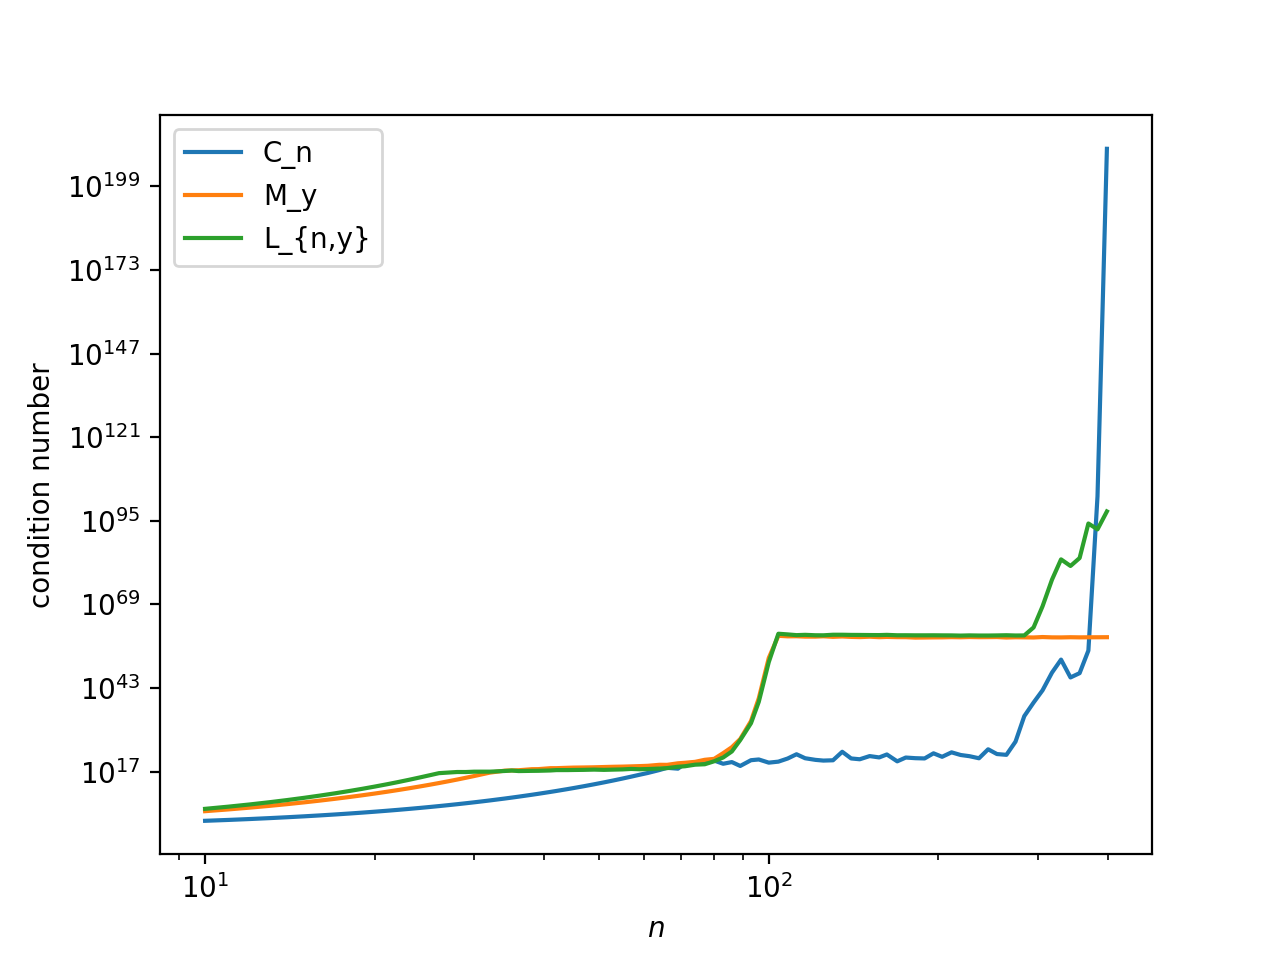

In [3]:
ns = np.logspace(1, 2.6, 100, dtype=np.int)
condition_numbers_C = [cond(mushi.SFS.C(n)) for n in ns]
condition_numbers_M = [cond(mushi.SFS(n).M(η)) for n in ns]
condition_numbers_CM = [cond(mushi.SFS.C(n) @ mushi.SFS(n).M(η)) for n in ns]
plt.figure()
plt.plot(ns, condition_numbers_C, label='C_n')
plt.plot(ns, condition_numbers_M, label='M_y')
plt.plot(ns, condition_numbers_CM, label='L_{n,y}')
plt.xlabel('$n$')
plt.ylabel('condition number')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

### Singular value spectrum of $L_{n,\mathbf y}$ with $n=200$

<IPython.core.display.Javascript object>


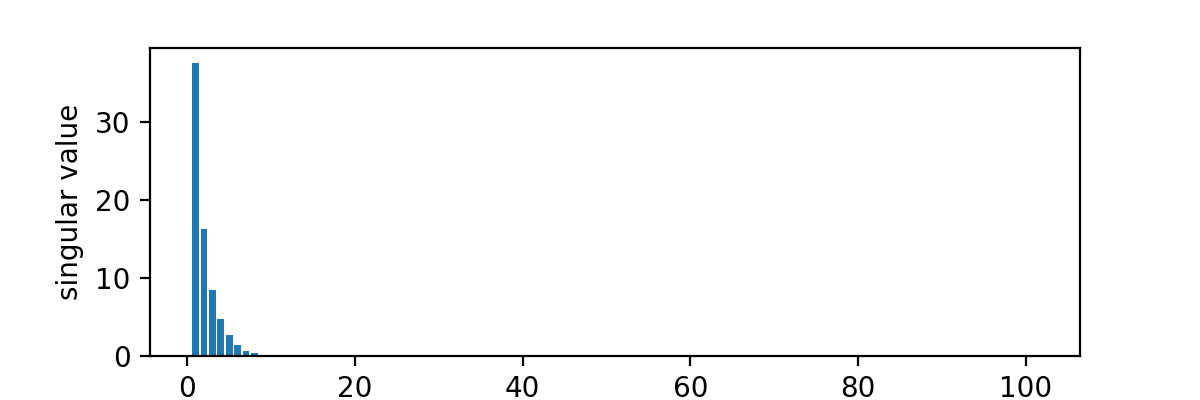

In [4]:
n = 200
u, s, vh = svd(mushi.SFS.C(n) @ mushi.SFS(n).M(η), full_matrices=False)
plt.figure(figsize=(6, 2))
plt.bar(np.arange(1, min(n, η.m() + 1)), s)
plt.ylabel('singular value')    
plt.show()

### Top 10 right singular vectors

<IPython.core.display.Javascript object>


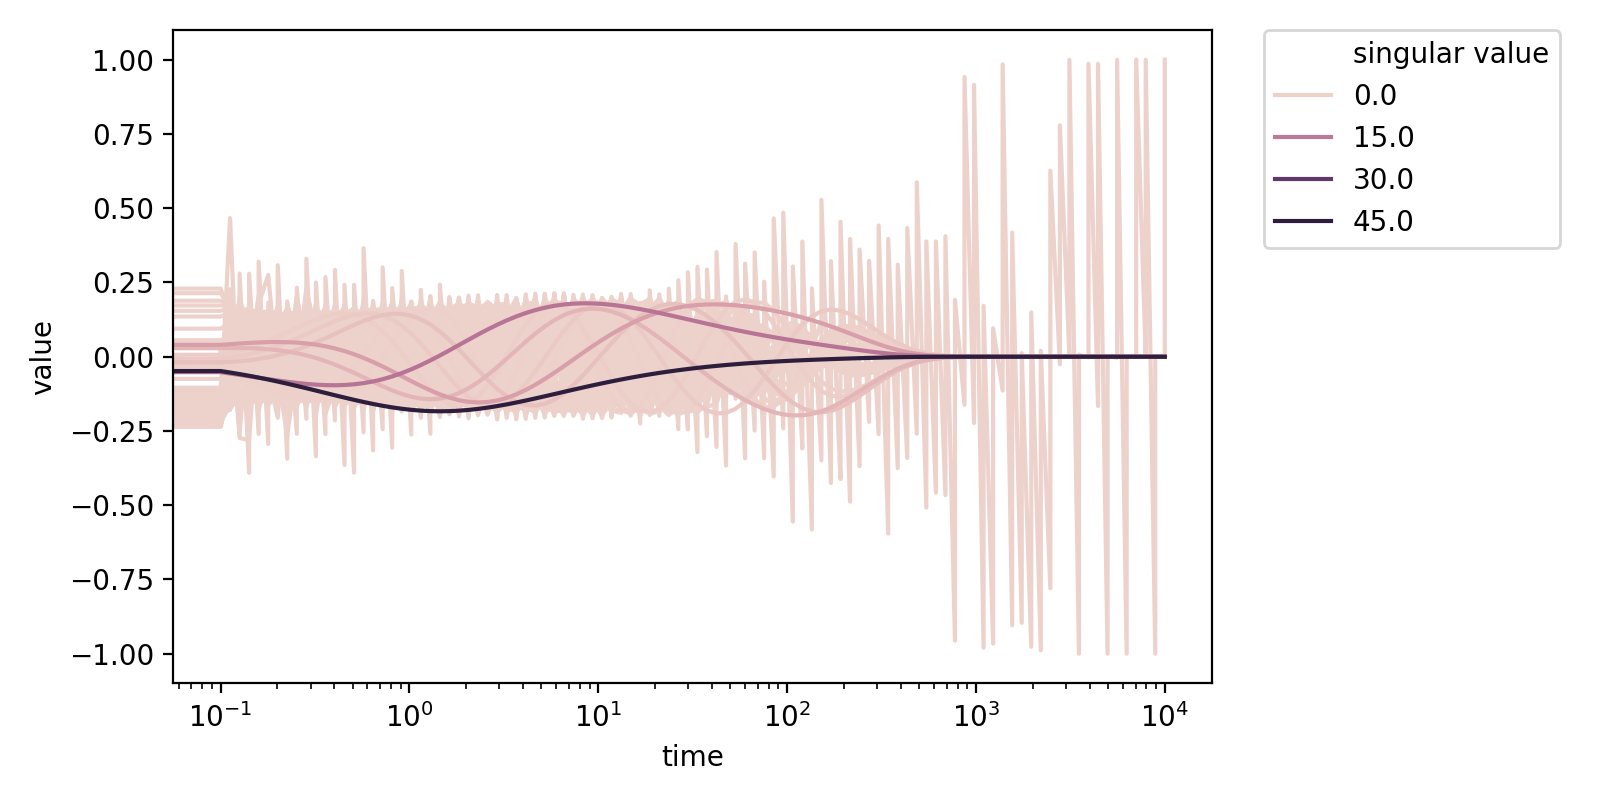

In [5]:
df = pd.DataFrame(vh.T, index=pd.Index(np.concatenate((np.array([0]), t)), name='time'))
df = df.melt().set_index('variable')
df['singular value'] = s[df.index]
df['time'] = np.tile(np.concatenate((np.array([0]), t)), df.index[-1] + 1)

# filter to top 10 singular values
# df = df[df.index < 10]

plt.figure(figsize=(8, 4))
ax = sns.lineplot(x='time', y='value', hue='singular value', units='singular value', data=df, estimator=None,
#              palette=sns.color_palette("RdBu", n_colors=df['singular value'].nunique())
            )
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()
plt.xscale('log')
plt.show()

### TMRCA CDF

<IPython.core.display.Javascript object>


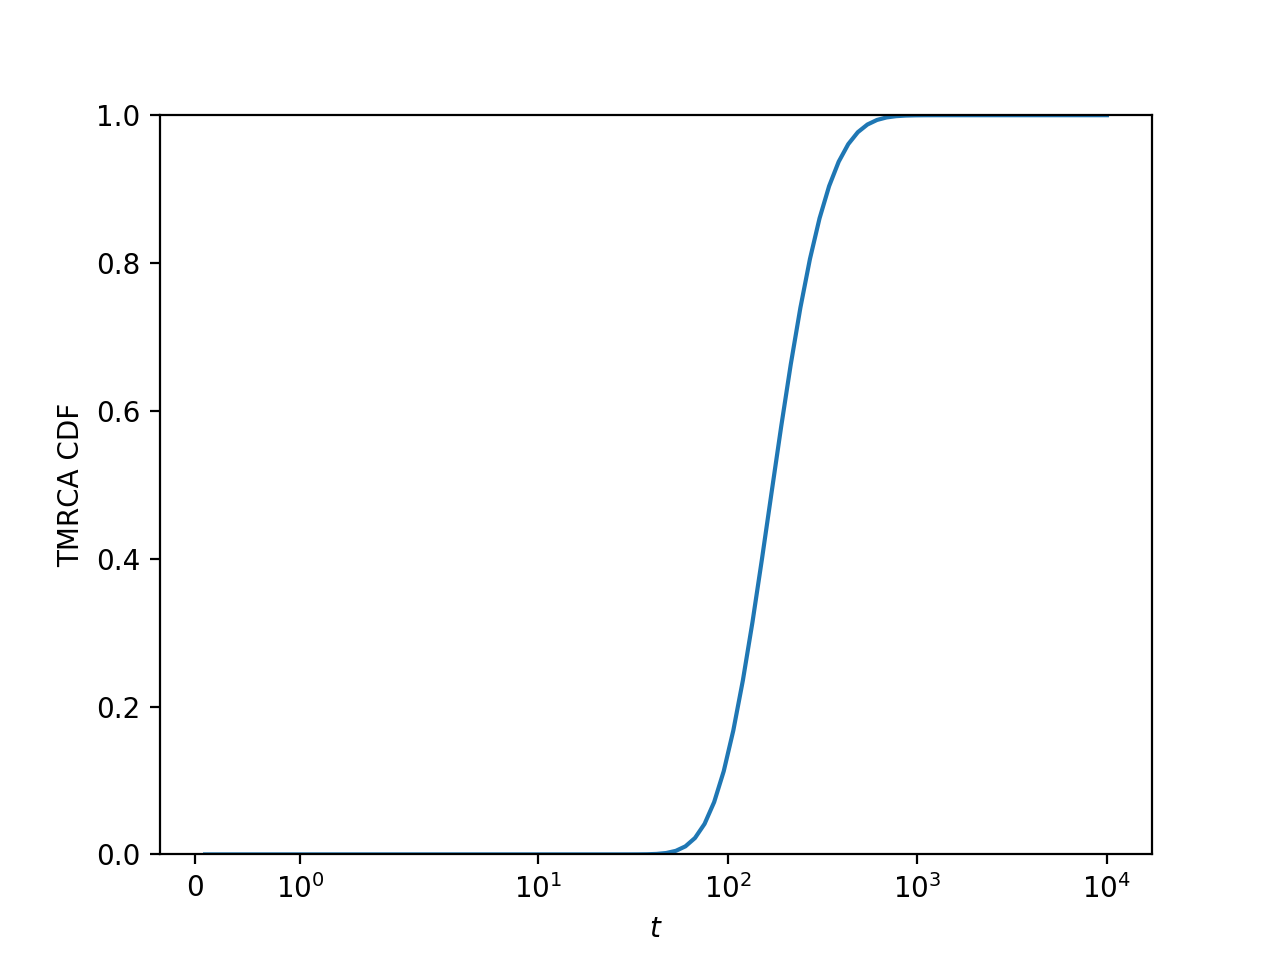

In [6]:
plt.figure()
plt.plot(η.change_points, mushi.SFS(n).tmrca_cdf(η))
plt.xlabel('$t$')
plt.xscale('symlog')
plt.ylim([0, 1])
plt.ylabel('TMRCA CDF')
plt.show()